In [291]:
# Importation of Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [292]:
# Plot Style
plt.rcParams.update({
    "figure.figsize": (12,6),
    "axes.grid": True,
    "grid.alpha": 0.3,
    "grid.linestyle": "--",
     "axes.titleweight": "bold"
})

### **QUESTION 1**

**Market (MKT)**

The market factor reflects broad systematic risk, so higher exposure means bearing more covariance with aggregate consumption risk. Investors demand compensation for this undiversifiable risk, leading to a positive expected premium.

**SMB (Size)**

Small firms are typically more financially constrained and riskier, which makes their cash flows more sensitive to economic downturns. Investors require a premium to hold these less established, more volatile companies.

**HML (Value)**

Value stocks (high book-to-market) often are distressed or neglected, making them riskier during downturns. Because of this counter-cyclical risk, they earn higher expected returns than growth stocks.

**RMW (Profitability)**

More profitable firms tend to have more persistent cash flows and lower distress risk. Low-profitability firms therefore require a premium to attract investors, making profitability a predictor of expected returns.

**CMA (Investment)**

Firms that invest aggressively are riskier because they expand when conditions look favorable, exposing them to downturn risk. Low-investment firms are more conservative and stable, so high-investment firms must offer higher expected returns.

**UMD (Momentum)**

Stocks that have performed well in the recent past tend to continue outperforming due to underreaction, slow-moving capital, or behavioral biases. Momentum therefore captures return persistence not explained by fundamentals alone.

**ROE (Return on Equity)**

High ROE firms generate strong earnings relative to equity and signal operational efficiency. These firms are more resilient, so low-ROE firms must offer higher returns to compensate investors for additional risk.

**IA (Investment-to-Assets)**

Firm investment intensity signals expectations embedded in valuation; high investment is often associated with overvaluation or lower marginal profitability of capital. Thus low-IA firms earn higher risk-adjusted returns than high-IA firms.

**BAB (Betting Against Beta)**

High-beta stocks are over-demanded by constrained investors seeking leverage, making low-beta stocks underpriced. Leveraging low-beta stocks (and shorting high-beta) historically yields excess returns to exploit this mispricing.

To compute $\theta$, we need to maximize the mean-variance objective as follows :

$$
\underbrace{\max_{\theta} \left( \mu' \theta - \frac{\gamma}{2}\theta' \Sigma \theta \right)}_{\text{Mean–variance objective}}
\quad \Longrightarrow \quad
\boxed{\theta^* = \frac{1}{\gamma}\Sigma^{-1}\mu}
$$

Where:
$$
\theta = \text{vector of portfolio weights in the 9 factors (9×1)}, \\
\mu = \text{vector of expected factor returns (9×1)}, \\
\Sigma = \text{covariance matrix of factor returns (9×9)}, \\
\gamma = \text{risk-aversion parameter (scalar, here } \gamma = 5).
$$


In [293]:
# Import & Format Excel File
facts = pd.read_csv('QPM-FactorsData-ForAssignment-04(Sheet1).csv', delimiter=';')
facts = facts.set_index('Dates')
facts.index = pd.to_datetime(facts.index, format='%Y%m')
facts = facts.apply(lambda col: col.str.replace(',', '.').astype(float))
facts.head()

,Market,SMB,HML,RMW,CMA,UMD,ROE,IA,BAB
Dates,,,,,,,,,
1967-02-01,0.0078,0.0334,-0.0217,0.0194,-0.0094,0.0356,0.035317,-0.002064,0.0262
1967-03-01,0.0399,0.0163,0.0031,0.0090,-0.0151,0.0142,0.018876,-0.016933,0.0081
1967-04-01,0.0389,0.0062,-0.0264,0.0243,-0.0375,0.0064,0.010983,-0.029519,0.0171
1967-05-01,-0.0433,0.0198,0.0080,-0.0175,0.0161,0.0067,0.005234,0.024686,0.0201
1967-06-01,0.0241,0.0596,0.0096,-0.0064,-0.0239,0.0603,0.002945,-0.021700,-0.0163


In [294]:
# Computation of weights for a mean-variance optimal investor

# Estimation of expected excess return vector and covariance matrix
mu = facts.mean()
cov = facts.cov()

# Investor risk aversion
gamma = 5

# Compute optimal vectors
theta_opt = (1 / gamma) * (np.linalg.inv(cov) @ mu)
theta_opt = pd.Series(theta_opt, index=facts.columns)
theta_opt

Market    1.106184
SMB       0.955817
HML      -0.155005
RMW       0.207042
CMA       0.153447
UMD       0.216184
ROE       1.773400
IA        2.726123
BAB       0.778341
dtype: float64

We suppose that there is **no leverage** with **no non-negativity** constraint so ```theta_opt``` has to sum up to 1.

In [295]:
# Scale weights so it sums up to 1
theta_opt = theta_opt / theta_opt.sum()
theta_opt

Market    0.142521
SMB       0.123148
HML      -0.019971
RMW       0.026675
CMA       0.019770
UMD       0.027853
ROE       0.228486
IA        0.351235
BAB       0.100282
dtype: float64

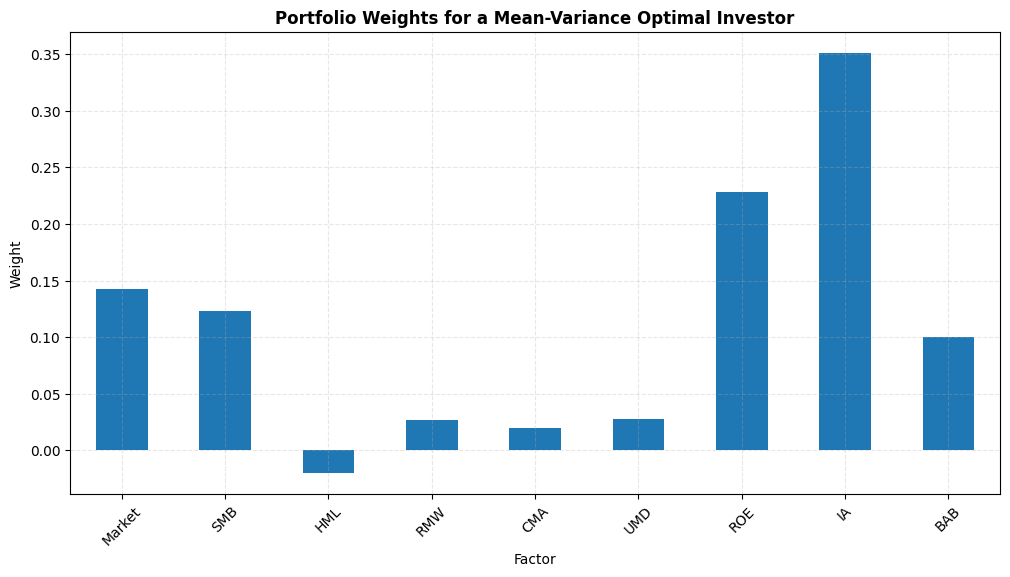

In [296]:
theta_opt.plot.bar(title='Portfolio Weights for a Mean-Variance Optimal Investor')
plt.xlabel('Factor')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.show()

In [297]:
# Sharpe Ratios for individual factors
sharpe_ratio_ind = mu / facts.std()

# Sharpe Ratio of the parametric portfolio
mu_portfolio = theta_opt.T @ mu
vol_portfolio = np.sqrt(theta_opt.T @ cov @ theta_opt)
sharpe_ratio_param = mu_portfolio / vol_portfolio

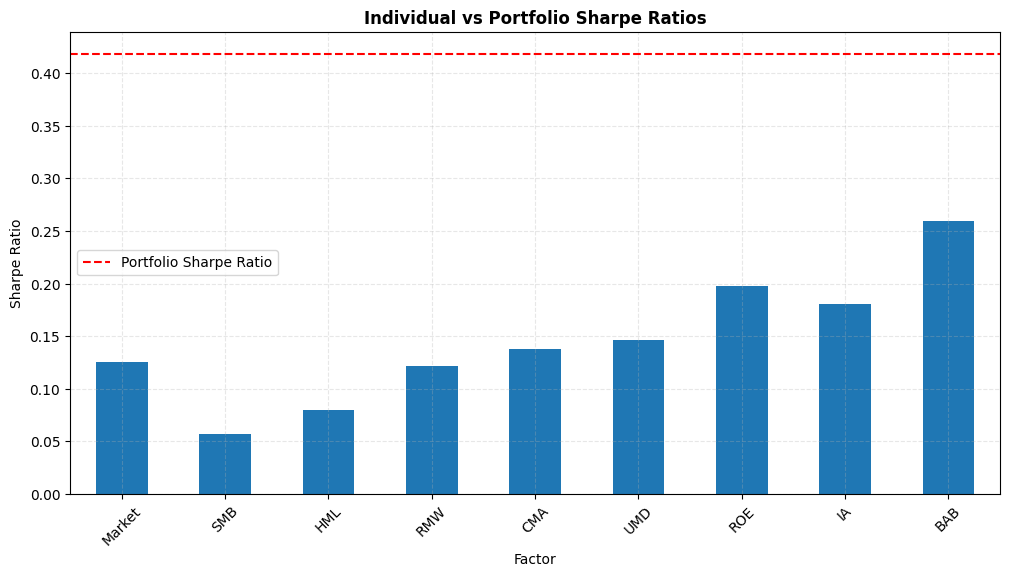

Portfolio Sharpe Ratio : 0.4185


In [298]:
# Comparaison of individual and portoflio sharpe ratios
sharpe_ratio_ind.plot.bar(title='Individual vs Portfolio Sharpe Ratios')
plt.axhline(y=sharpe_ratio_param, linestyle='--', c='r', label='Portfolio Sharpe Ratio')
plt.xlabel('Factor')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=45)
plt.legend()
plt.show()

print(f'Portfolio Sharpe Ratio : {sharpe_ratio_param:.4f}')

The **parametric portfolio** Sharpe ratio exceeds all **individual** factor Sharpe ratios, showing that **diversification** across factors **reduces risk** without proportionally **reducing returns**, leading to a more efficient portfolio.

Each of the nine factor is itself a portfolio formed of the 2000 assets available in our universe. We note $W = w_{i,j}$ each of these weights. Thus, the weight of asset $i$ is given by $w_i^* = \sum_{j=1}^{9}\theta_j w_{i,j}$.

In matrix form, this is given my the matrix $w^*$ such that $w^* = W\theta$.

### **QUESTION 2**

In [299]:
window = 120    # Estimation window of 120 months
start_date = '1977-01-01'
end_date = '2020-12-01'

To get $c$, we first construct the **raw volatility–scaled factor**
$$
\tilde{f}_{t+1} = \frac{1}{\sigma_t^2(f)} f_{t+1},
$$
but this changes the volatility of the series. To make it comparable to the original factor,
we rescale it by a constant \(c\):
$$
f^\sigma_{t+1} = c\,\tilde{f}_{t+1}.
$$
Since volatility scales linearly with constants,
$$
\sigma(f^\sigma) = c\,\sigma(\tilde{f}),
$$
and imposing equal volatility to the original factor yields
$$
\boxed{c = \frac{\sigma(f)}{\sigma(\tilde{f})}}.
$$


In [300]:
# Computation of the raw volatility-scaled factors
vol_12m = facts.rolling(window=12).std().shift(1)
facts_scaled_raw = (1 / (vol_12m ** 2)) * facts
facts_scaled_raw = facts_scaled_raw[start_date:end_date]

# Calculation of c factor
c = facts[start_date:end_date].std() / facts_scaled_raw[start_date:end_date].std()

# Infer volatlity-scaled factor
facts_scaled = c * facts_scaled_raw
facts_scaled = facts_scaled.dropna()
facts_scaled.head()

,Market,SMB,HML,RMW,CMA,UMD,ROE,IA,BAB
Dates,,,,,,,,,
1977-01-01,-0.025264,0.026638,0.023163,-0.006655,0.016634,0.110867,-0.023030,0.012120,0.100712
1977-02-01,-0.026269,0.006029,0.005282,-0.001848,-0.001721,0.011153,0.014437,0.001545,0.046170
1977-03-01,-0.017579,0.010428,0.020948,-0.006709,-0.001451,0.015612,0.005936,-0.002499,0.022112
1977-04-01,0.002007,-0.001353,0.073344,-0.042658,0.019903,0.135008,0.012014,0.023769,0.022214
1977-05-01,-0.019829,0.013261,0.014909,0.005553,0.001957,0.042612,0.056503,0.003786,0.022565


We construct, for each factor, a mean-variance optimal portfolio using the 
original factor return $f_{t+1}$ and its volatility-managed version $f^{\sigma}_{t+1}$. 
Let $r_{t+1} = (f_{t+1},\, f^{\sigma}_{t+1})'$ denote the two return streams over the 
evaluation period 1977-2020, with mean vector $\mu$ and covariance matrix $\Sigma$. 
For a mean–variance investor with risk aversion $\gamma = 5$, the optimal allocation is

$$
w^* = \frac{1}{\gamma}\Sigma^{-1}\mu,
$$

optionally normalised so that $w^*_1 + w^*_2 = 1$. 
This yields the optimal weights assigned to the original factor and its volatility–timed version.


In [301]:
gamma = 5
weights = {}

for fact in facts.columns:
    # Extraction of original and volatility-scaled factors for each factor
    original = facts.loc[start_date:end_date, fact]
    timed = facts_scaled[fact]

    # Dataframe of the two factors combined for each factor
    df_combined = pd.concat([original, timed], axis=1)
    df_combined.columns = ["original", "timed"]

    # Compute expected returns and covariance matrix
    mu = df_combined.mean()
    cov = df_combined.cov()

    # Compute optimal weights
    w_opt = (1 / gamma) * (np.linalg.inv(cov) @ mu)
    w_opt = pd.Series(w_opt, index=['original', 'timed'])
    
    # Scale weights
    w_opt = w_opt / w_opt.sum()
    weights[fact] = w_opt

# Convert into a dataframe
weights = pd.DataFrame(weights).T

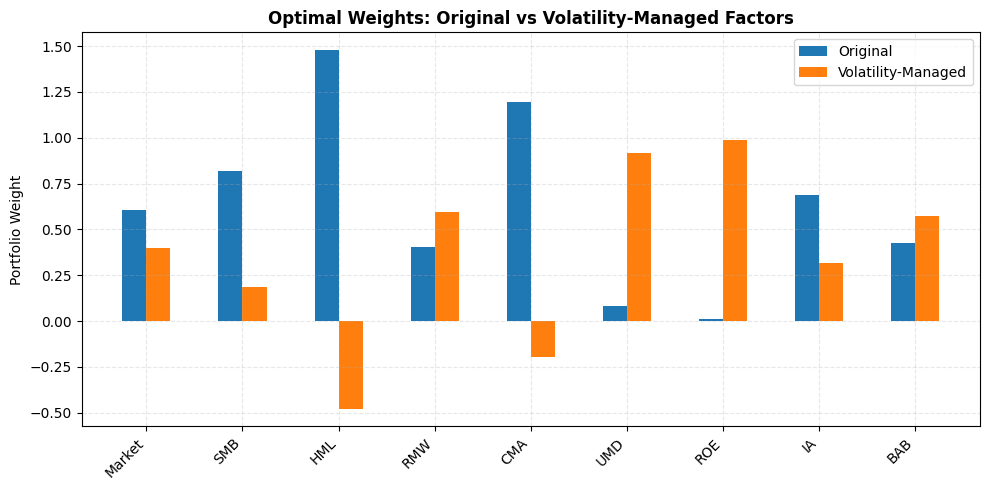

In [302]:
# VISUALTISATION
original_w = weights['original']
timed_w    = weights['timed']

factors = weights.index
x = np.arange(len(factors))     # position sur l’axe X
width = 0.25                   # largeur de chaque barre

plt.figure(figsize=(10,5))

# Bars côte-à-côte
plt.bar(x - width/2, original_w,  width, label="Original")
plt.bar(x + width/2, timed_w,     width, label="Volatility-Managed")

# Labels
plt.xticks(x, factors, rotation=45, ha='right')
plt.ylabel("Portfolio Weight")
plt.title("Optimal Weights: Original vs Volatility-Managed Factors")
plt.legend()

plt.tight_layout()
plt.show()

We first construct the volatility–managed factor $f_{t+1}^{\sigma}$ by scaling 
each factor return using the inverse of its past 12-month volatility and rescaling 
with a constant $c$ so that the unconditional volatility matches that of the 
original factor.

To evaluate performance out-of-sample, we employ a 120-month rolling window. 
At each month $t$, we estimate $\mu_t$ and $\Sigma_t$ using returns from the 
previous ten years, construct optimal weights 
$w_{t} = \frac{1}{\gamma}\Sigma_t^{-1}\mu_t$, and apply them to month $t\!+\!1$. 
The resulting sequence of returns from 1977--2020 is used to compute 
out-of-sample Sharpe ratios for the original factor and for the portfolio that 
combines the original and volatility-managed versions.


In [303]:
# Sharpe ratios for each factor
sharpe_ratios_original = {}
sharpe_ratios_timed = {}

for fact in facts.columns:
    # Original and volatility-scaled factors
    original = facts[fact][start_date:end_date]
    timed = facts_scaled[fact]

    # OOS returns for each version
    OSS_rets_original = []
    OSS_rets_timed = []

    # Rolling window of 120 months to compute mu and cov
    for t in range(window, len(original)):
        
        # Combined Dataframe of versions
        df_combined = pd.concat([original[t-window:t], timed[t-window:t]], axis=1)
        
        # mu an cov on each version
        mu = df_combined.mean()
        cov = df_combined.cov()

        # Optimal mean-variance portfolio weights
        w_opt = (1 / gamma) * (np.linalg.inv(cov) @ mu)
        w_opt = w_opt / w_opt.sum()

        # Computation of returns 1 time step ahead
        ret_original = original.iloc[t]
        ret_mix = w_opt[0] * original.iloc[t] + w_opt[1] * timed.iloc[t]

        # Add to list
        OSS_rets_original.append(ret_original)
        OSS_rets_timed.append(ret_mix)

    # final Sharpe ratios for full OOS period (not per window)
    sharpe_ratios_original[fact] = np.mean(OSS_rets_original) / np.std(OSS_rets_original)
    sharpe_ratios_timed[fact] = np.mean(OSS_rets_timed)  / np.std(OSS_rets_timed)

# Results
rolling_sharpe_df = pd.DataFrame({
        "Sharpe Original (120m OOS)" : sharpe_ratios_original,
        "Sharpe Mixed (120m OOS)"    : sharpe_ratios_timed
}).round(3)

rolling_sharpe_df

,Sharpe Original (120m OOS),Sharpe Mixed (120m OOS)
Market,0.161,-0.058
SMB,0.024,0.053
HML,0.016,0.000
RMW,0.132,-0.020
CMA,0.098,0.043
UMD,0.106,0.150
ROE,0.157,0.201
IA,0.105,0.090
BAB,0.193,0.149


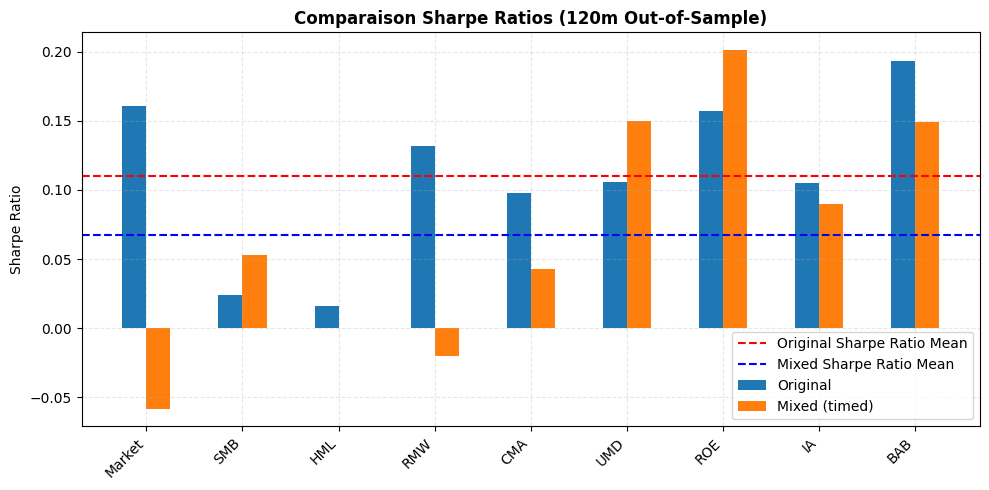

In [304]:
# VISUALISATION
sharpe = rolling_sharpe_df   # Just for readability

factors = sharpe.index
x = np.arange(len(factors))
width = 0.25  # largeur des barres

plt.figure(figsize=(10,5))

plt.bar(x - width/2, sharpe["Sharpe Original (120m OOS)"], width, label="Original")
plt.bar(x + width/2, sharpe["Sharpe Mixed (120m OOS)"],    width, label="Mixed (timed)")

plt.axhline(y=sharpe["Sharpe Original (120m OOS)"].mean(), c='r', linestyle='--', label='Original Sharpe Ratio Mean')
plt.axhline(y=sharpe['Sharpe Mixed (120m OOS)'].mean(), c='blue', linestyle='--', label='Mixed Sharpe Ratio Mean')

plt.xticks(x, factors, rotation=45, ha='right')
plt.ylabel("Sharpe Ratio")
plt.title("Comparaison Sharpe Ratios (120m Out-of-Sample)")
plt.legend()

plt.tight_layout()
plt.show()

It seems that the **original factos** outperform the **volatility-managed combination** for most factors. This implies that volatility timing **does not manage to enhance performance**. The managed version **reduces volatility**, but the **decreasing performance** in mean returns offset this benefit. This results in **lower mean sharpe ratio** across factors.

### **CONCLUSION**

In this assignment, we first analyzed **nine equity factors** and built a **mean‐variance optimal portfolio** using full‐sample estimates. The results suggest that combining factors **enhances diversification** and delivers a **better risk–return profile** than holding a single factor in isolation. This highlights the importance of **diversification**, as cross-factor allocation improved the Sharpe ratio relative to individual factor exposures.

We then constructed a **volatility-managed** version of each factor and evaluated **out-of-sample performance** using a *120-month* rolling window. The results indicate that, for most factors and on average (though not uniformly across all cases), the **original factors** produced slightly **better risk–return outcomes** than their **volatility-managed counterparts**.